**Mini Project - Netflix Data Analysis**

Import required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# To make charts look better
plt.style.use('ggplot')
sns.set_palette("Set2")


Load Netflix dataset

In [2]:
df = pd.read_csv(r"E:\3 sem\ai project\netflix.csv")

# Display first few rows
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Check basic dataset information & also Check for missing values

In [4]:
print("Basic Info:")
print(df.info())

#Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None

Missing Values:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_i

**1-  What is the ratio of Movies vs TV Shows on Netflix?**

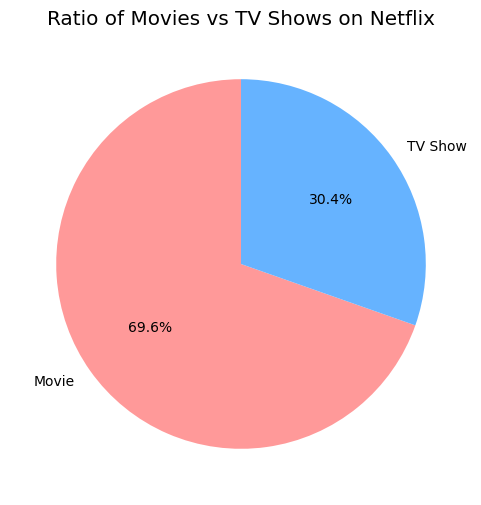

Movies vs TV Shows Count:
type
Movie      6131
TV Show    2676
Name: count, dtype: int64


In [5]:
type_counts = df['type'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title("Ratio of Movies vs TV Shows on Netflix")
plt.show()

print("Movies vs TV Shows Count:")
print(type_counts)


**Insight**
Netflix library mostly consists of Movies (≈70%) compared to TV Shows (≈30%).
This shows that Netflix’s major content offering is still movie-focused, though TV Shows are steadily growing due to binge culture.

**2- Which genres are most popular on Netflix globally?**

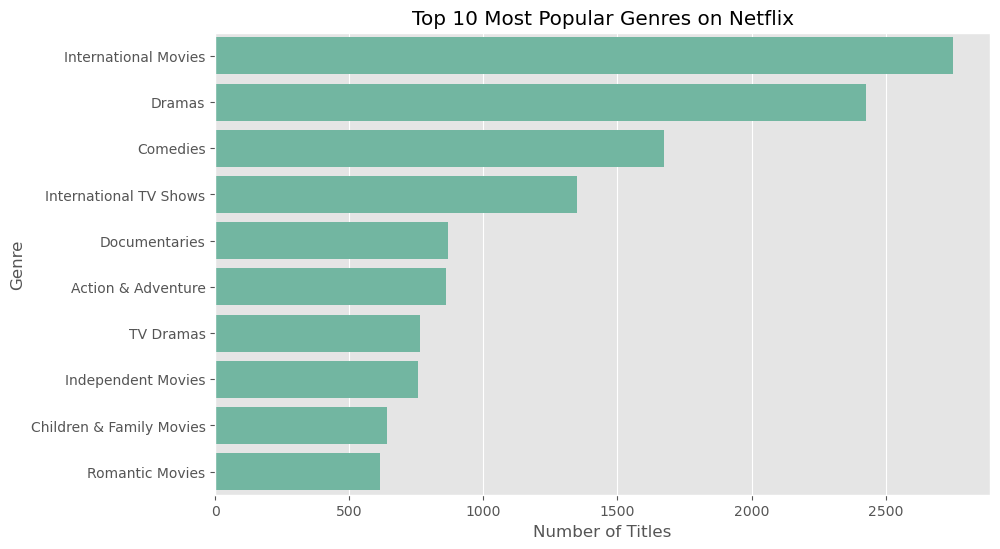

Top Genres:
 International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1351
Documentaries                869
Action & Adventure           859
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: count, dtype: int64


In [6]:
# Popular genres on Netflix
# Split 'listed_in' column (it contains genres separated by commas)
genre_list = df['listed_in'].dropna().str.split(',').sum()
genre_counts = pd.Series(genre_list).str.strip().value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=genre_counts.values, y=genre_counts.index)
plt.title("Top 10 Most Popular Genres on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.show()

print("Top Genres:\n", genre_counts)


**Insight**
Top genres are International Movies, Dramas, and Comedies.
Indicates Netflix’s strong global presence and audience interest in diverse, story-driven, and light-hearted content.

**3- Which years saw the highest release of content on Netflix?**

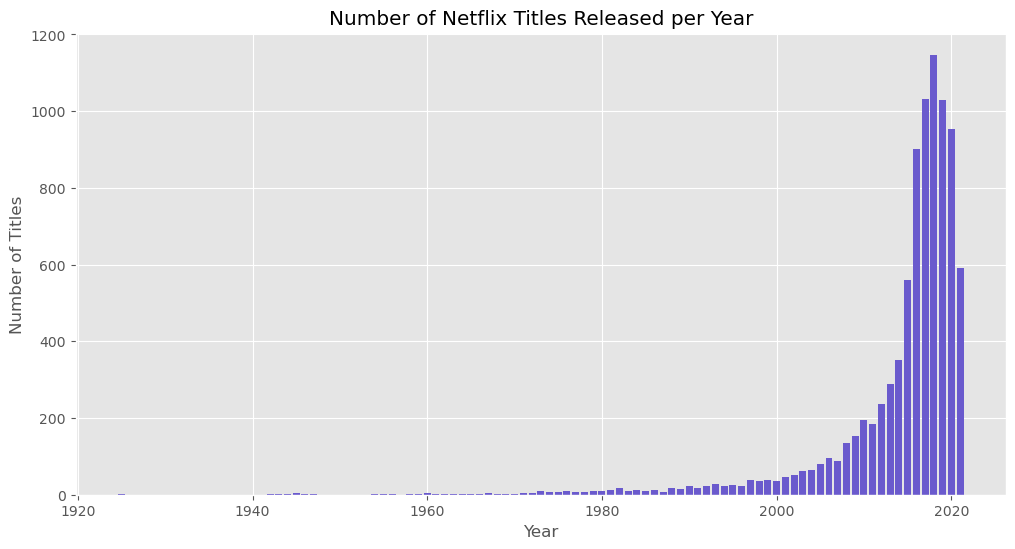

Top Years with Most Releases:
release_year
2018    1147
2017    1032
2019    1030
2020     953
2016     902
2021     592
2015     560
2014     352
2013     288
2012     237
Name: count, dtype: int64


In [7]:
# Which years saw the highest content release
year_counts = df['release_year'].value_counts().sort_index()

plt.figure(figsize=(12,6))
plt.bar(year_counts.index, year_counts.values, color="#6A5ACD")
plt.title("Number of Netflix Titles Released per Year")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.show()

print("Top Years with Most Releases:")
print(year_counts.sort_values(ascending=False).head(10))


**Insight:**
Peak years of content release were 2018–2020.
Reflects Netflix’s heavy investment and content expansion during those years, likely due to the streaming boom before and during the pandemic.

**4-  Which countries produce the most Netflix content?**

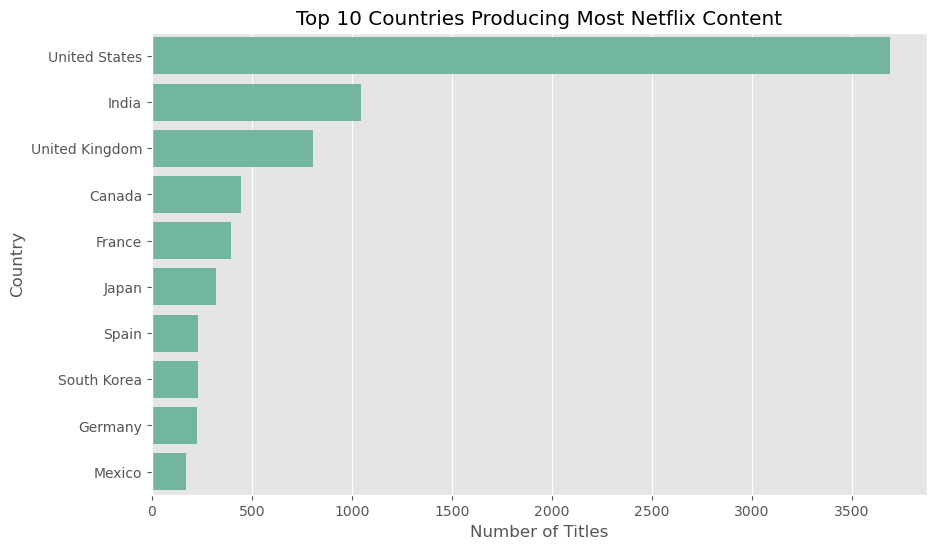

Top Content Producing Countries:
 United States     3690
India             1046
United Kingdom     806
Canada             445
France             393
Japan              318
Spain              232
South Korea        231
Germany            226
Mexico             169
Name: count, dtype: int64


In [8]:
# Top 10 countries producing most content
country_counts = df['country'].dropna().str.split(',').sum()
country_counts = pd.Series(country_counts).str.strip().value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=country_counts.values, y=country_counts.index)
plt.title("Top 10 Countries Producing Most Netflix Content")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()

print("Top Content Producing Countries:\n", country_counts)


**Insight:**
The United States dominates, followed by India and the United Kingdom.
Confirms Netflix’s strong collaboration with Hollywood and emerging markets like India for local-language originals.

**5- How has the trend of adding new content evolved year by year?**

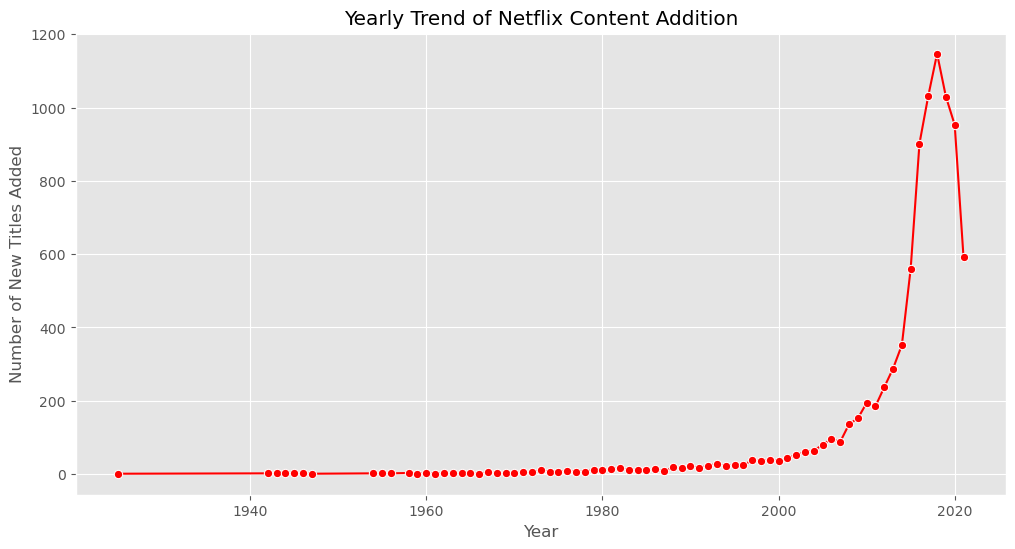

In [9]:
# Trend of adding new content over the years
plt.figure(figsize=(12,6))
sns.lineplot(x=year_counts.index, y=year_counts.values, marker='o', color='red')
plt.title("Yearly Trend of Netflix Content Addition")
plt.xlabel("Year")
plt.ylabel("Number of New Titles Added")
plt.show()


**Insight:**
Steady upward trend until 2020, then a dip.
Suggests post-pandemic slowdown or strategic shift towards quality over quantity in content production.

**6- Which ratings (e.g., TV-MA, PG, etc.) are most frequent on Netflix?**

C:\Users\himan\AppData\Local\Temp\ipykernel_11424\2589568782.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_counts.values, y=rating_counts.index, palette="muted")


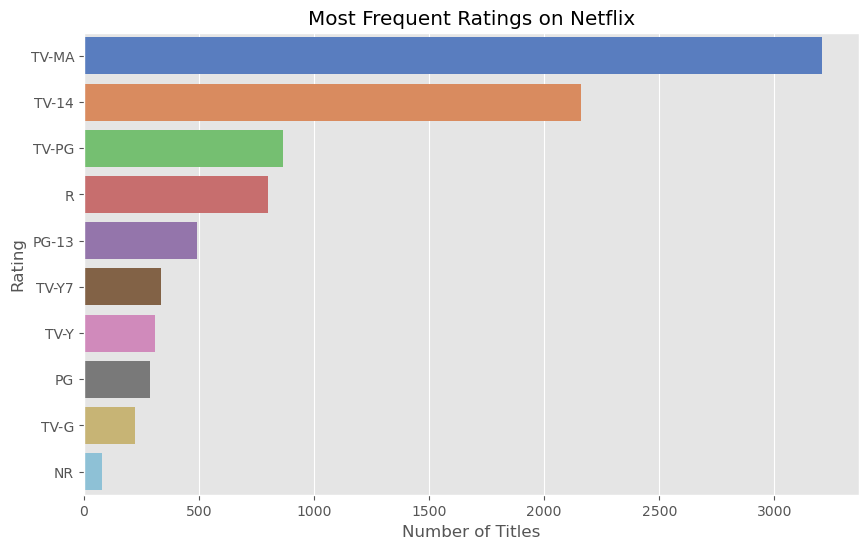

Most Common Ratings:
 rating
TV-MA    3207
TV-14    2160
TV-PG     863
R         799
PG-13     490
TV-Y7     334
TV-Y      307
PG        287
TV-G      220
NR         80
Name: count, dtype: int64


In [10]:
# Most common content ratings (TV-MA, PG, etc.)
rating_counts = df['rating'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=rating_counts.values, y=rating_counts.index, palette="muted")
plt.title("Most Frequent Ratings on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Rating")
plt.show()

print("Most Common Ratings:\n", rating_counts)


**Insight:**
Most content is TV-MA (mature audiences).
 Indicates Netflix’s target audience is primarily adults, with bold and unrestricted storytelling styles.

**7- Do some countries tend to produce more mature content (TV-MA)?**

C:\Users\himan\AppData\Local\Temp\ipykernel_11424\1723565046.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_tvma.values, y=country_tvma.index, palette="rocket")


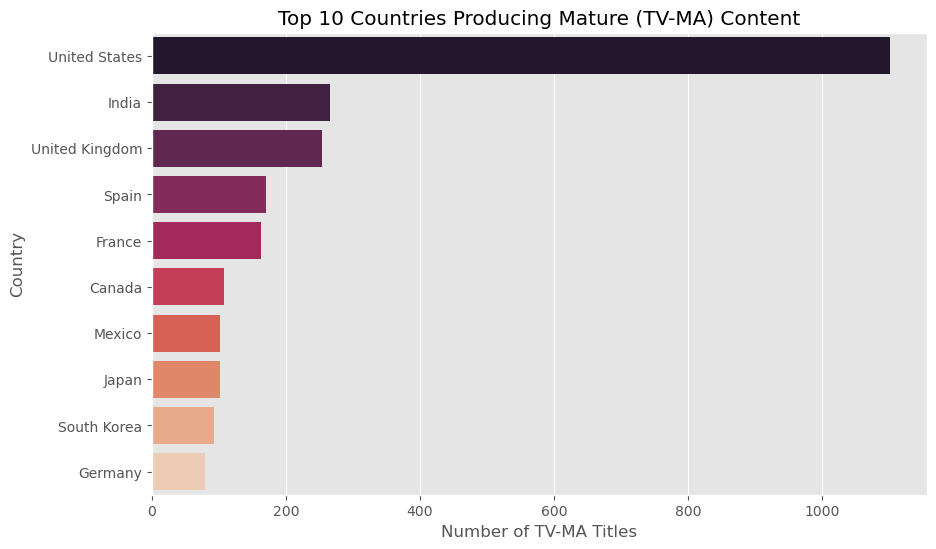

Top 10 Mature Content Producing Countries:
 United States     1101
India              266
United Kingdom     253
Spain              170
France             163
Canada             107
Mexico             102
Japan              101
South Korea         92
Germany             79
Name: count, dtype: int64


In [11]:
#  Countries that produce most mature (TV-MA) content
tv_ma = df[df['rating'] == 'TV-MA']

country_tvma = tv_ma['country'].dropna().str.split(',').sum()
country_tvma = pd.Series(country_tvma).str.strip().value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=country_tvma.values, y=country_tvma.index, palette="rocket")
plt.title("Top 10 Countries Producing Mature (TV-MA) Content")
plt.xlabel("Number of TV-MA Titles")
plt.ylabel("Country")
plt.show()

print("Top 10 Mature Content Producing Countries:\n", country_tvma)


**Insight:**
USA leads in mature-rated content, followed by India and the UK.
Suggests higher demand and production of adult-oriented or realistic themes in these regions.

**8- Which genres are more associated with TV Shows vs Movies?**


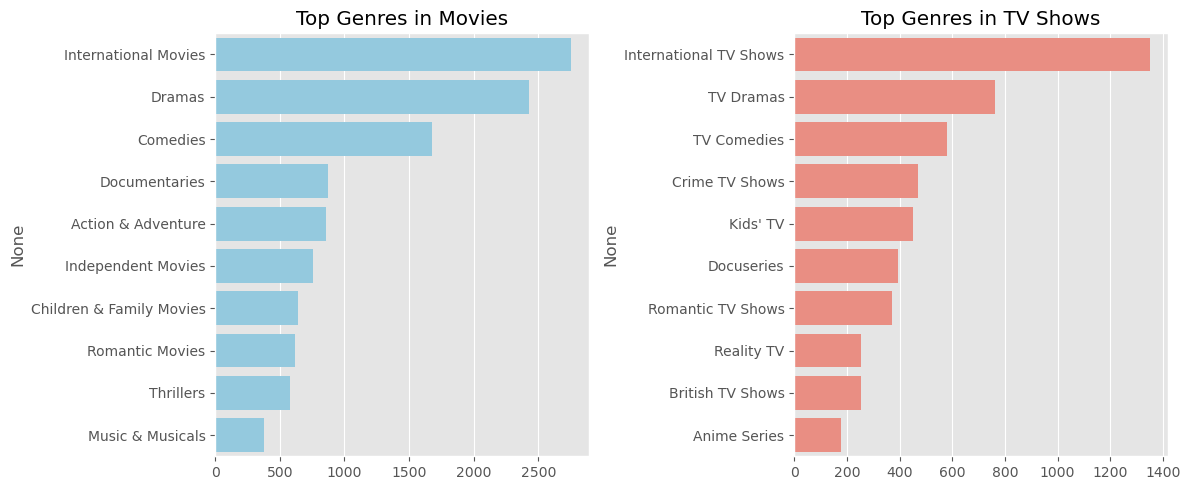

Top Movie Genres:
 International Movies        2752
Dramas                      2427
Comedies                    1674
Documentaries                869
Action & Adventure           859
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Thrillers                    577
Music & Musicals             375
Name: count, dtype: int64

Top TV Show Genres:
 International TV Shows    1351
TV Dramas                  763
TV Comedies                581
Crime TV Shows             470
Kids' TV                   451
Docuseries                 395
Romantic TV Shows          370
Reality TV                 255
British TV Shows           253
Anime Series               176
Name: count, dtype: int64


In [12]:
# Genre comparison between Movies and TV Shows
movie_genres = df[df['type'] == 'Movie']['listed_in'].dropna().str.split(',').sum()
tvshow_genres = df[df['type'] == 'TV Show']['listed_in'].dropna().str.split(',').sum()

movie_genre_counts = pd.Series(movie_genres).str.strip().value_counts().head(10)
tvshow_genre_counts = pd.Series(tvshow_genres).str.strip().value_counts().head(10)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.barplot(x=movie_genre_counts.values, y=movie_genre_counts.index, color='skyblue')
plt.title("Top Genres in Movies")

plt.subplot(1,2,2)
sns.barplot(x=tvshow_genre_counts.values, y=tvshow_genre_counts.index, color='salmon')
plt.title("Top Genres in TV Shows")

plt.tight_layout()
plt.show()

print("Top Movie Genres:\n", movie_genre_counts)
print("\nTop TV Show Genres:\n", tvshow_genre_counts)


**Insight:**
Movies focus on International, Drama, and Comedy,
while TV Shows emphasize International TV, Crime, and Romantic genres.
 Shows that Netflix’s TV shows lean towards serial storytelling and emotional engagement.

**9- Which genres dominate the U.S. vs other countries?**

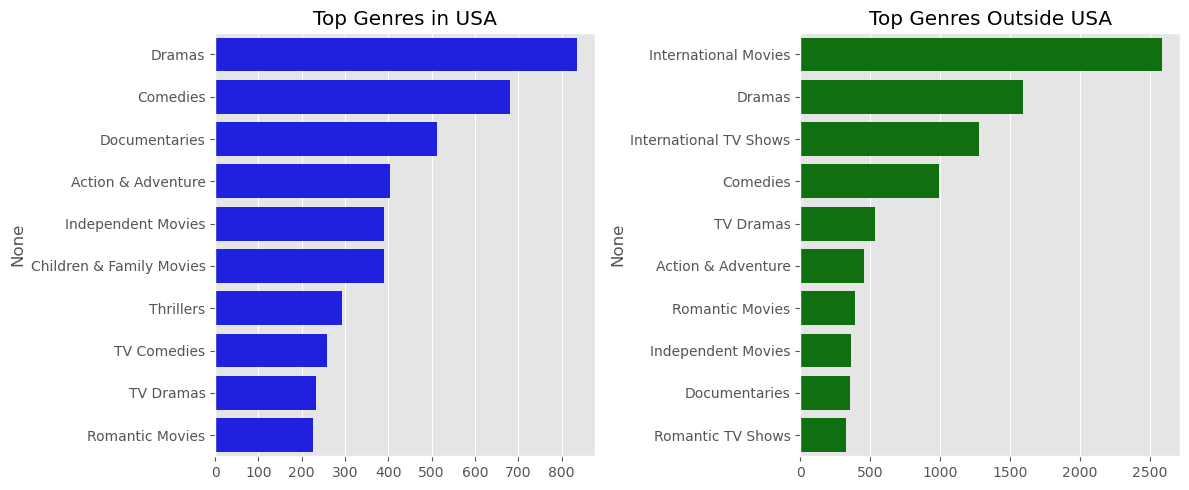

Top USA Genres:
 Dramas                      835
Comedies                    680
Documentaries               512
Action & Adventure          404
Independent Movies          390
Children & Family Movies    390
Thrillers                   292
TV Comedies                 258
TV Dramas                   232
Romantic Movies             225
Name: count, dtype: int64

Top Global (Non-USA) Genres:
 International Movies      2586
Dramas                    1592
International TV Shows    1277
Comedies                   994
TV Dramas                  531
Action & Adventure         455
Romantic Movies            391
Independent Movies         366
Documentaries              357
Romantic TV Shows          326
Name: count, dtype: int64


In [14]:
# Compare genres in the USA vs rest of the world
usa_data = df[df['country'].notna() & df['country'].str.contains("United States", na=False)]
other_data = df[~df['country'].notna() | ~df['country'].str.contains("United States", na=False)]

usa_genres = usa_data['listed_in'].dropna().str.split(',').sum()
other_genres = other_data['listed_in'].dropna().str.split(',').sum()

usa_genre_counts = pd.Series(usa_genres).str.strip().value_counts().head(10)
other_genre_counts = pd.Series(other_genres).str.strip().value_counts().head(10)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.barplot(x=usa_genre_counts.values, y=usa_genre_counts.index, color='blue')
plt.title("Top Genres in USA")

plt.subplot(1,2,2)
sns.barplot(x=other_genre_counts.values, y=other_genre_counts.index, color='green')
plt.title("Top Genres Outside USA")

plt.tight_layout()
plt.show()

print("Top USA Genres:\n", usa_genre_counts)
print("\nTop Global (Non-USA) Genres:\n", other_genre_counts)


**Insight:**
USA: Dominated by Documentaries, Comedies, and Dramas.
Rest of World: International Movies and Dramas lead.
Netflix globally focuses on local storytelling for international audiences.

**10- What genres are most popular in the last 3 years?**


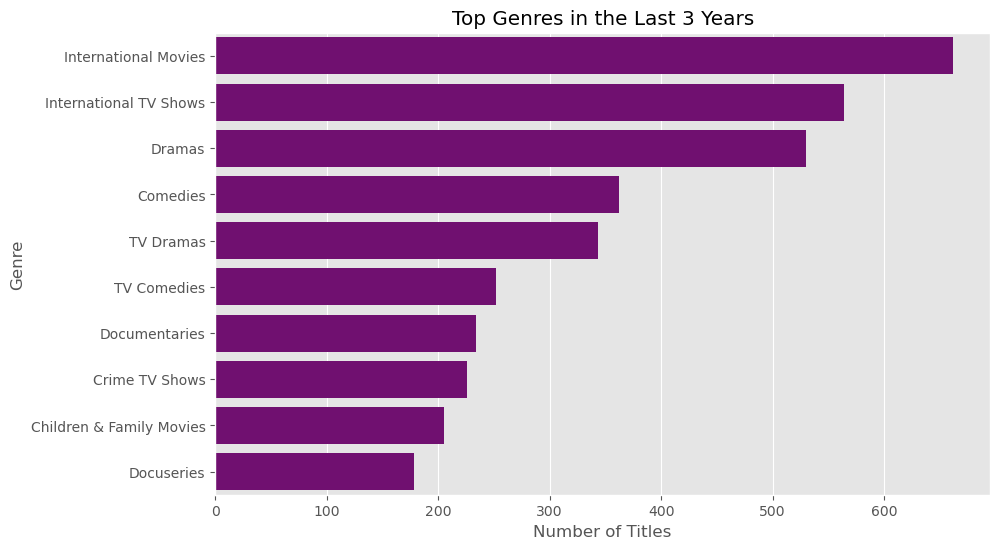

Recent 3-Year Popular Genres:
 International Movies        662
International TV Shows      564
Dramas                      530
Comedies                    362
TV Dramas                   343
TV Comedies                 252
Documentaries               234
Crime TV Shows              226
Children & Family Movies    205
Docuseries                  178
Name: count, dtype: int64


In [15]:
#  Find genres popular in the last 3 years
recent_years = df[df['release_year'] >= (df['release_year'].max() - 2)]
recent_genres = recent_years['listed_in'].dropna().str.split(',').sum()
recent_genre_counts = pd.Series(recent_genres).str.strip().value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=recent_genre_counts.values, y=recent_genre_counts.index, color='purple')
plt.title("Top Genres in the Last 3 Years")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.show()

print("Recent 3-Year Popular Genres:\n", recent_genre_counts)


**Insight:**
Recent years show rise in International TV Shows and Crime Series.
 Indicates Netflix’s push toward global content and serialized crime/drama storytelling.

**11- Who are the top 10 directors with the most Netflix content?**


C:\Users\himan\AppData\Local\Temp\ipykernel_11424\3241363719.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=director_counts.values, y=director_counts.index, palette="coolwarm")


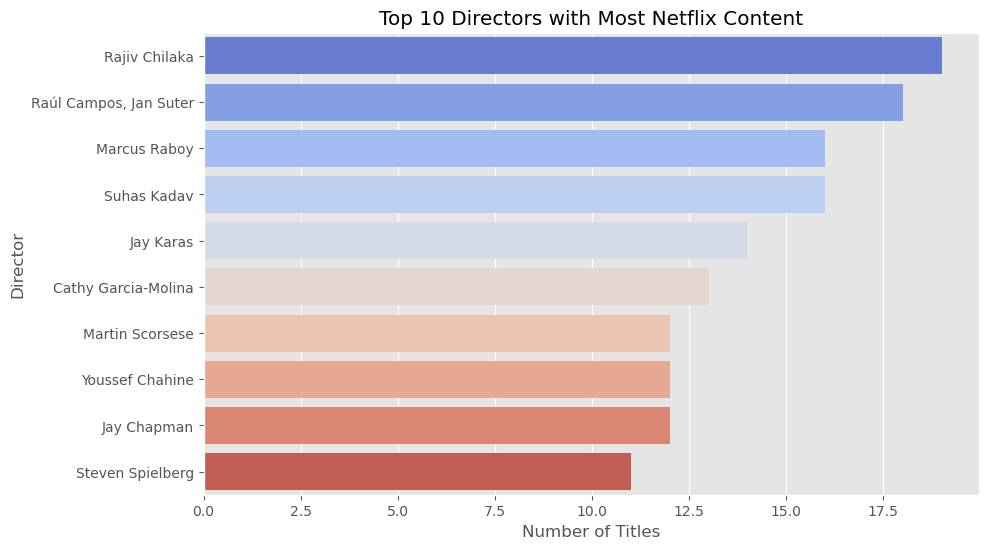

Top 10 Directors on Netflix:
 director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Youssef Chahine           12
Jay Chapman               12
Steven Spielberg          11
Name: count, dtype: int64


In [16]:
# Top 10 Directors with Most Netflix Titles
director_counts = df['director'].dropna().value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=director_counts.values, y=director_counts.index, palette="coolwarm")
plt.title("Top 10 Directors with Most Netflix Content")
plt.xlabel("Number of Titles")
plt.ylabel("Director")
plt.show()

print("Top 10 Directors on Netflix:\n", director_counts)


**Insight:**
Indian directors like Rajiv Chilaka and Suhas Kadav top the list (mostly animated/family content).
 Reflects Netflix’s focus on children/family animation and Indian originals.

**12- Which actors appear most frequently in Netflix shows?**

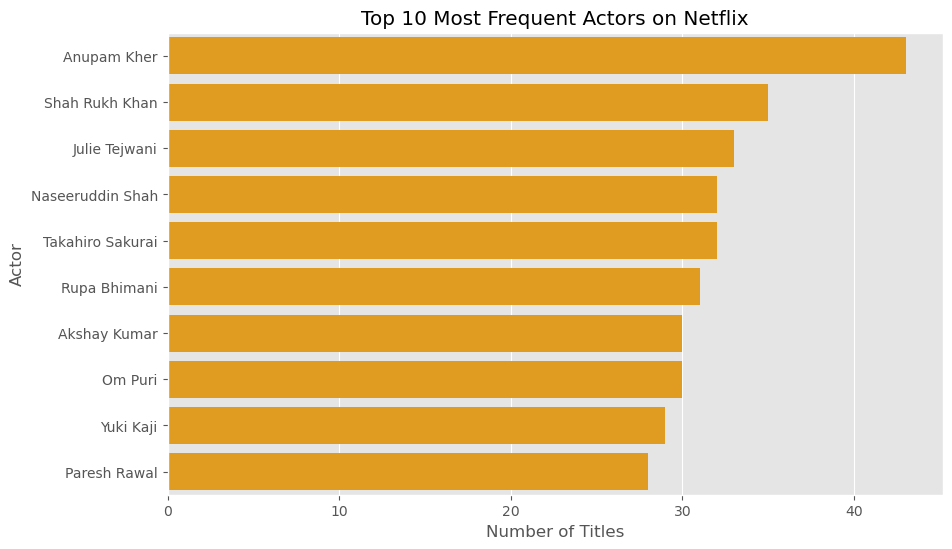

Top 10 Most Frequent Actors on Netflix:
 Anupam Kher         43
Shah Rukh Khan      35
Julie Tejwani       33
Naseeruddin Shah    32
Takahiro Sakurai    32
Rupa Bhimani        31
Akshay Kumar        30
Om Puri             30
Yuki Kaji           29
Paresh Rawal        28
Name: count, dtype: int64


In [17]:
# Most frequent actors appearing in Netflix content
actor_list = df['cast'].dropna().str.split(',').sum()
actor_counts = pd.Series(actor_list).str.strip().value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=actor_counts.values, y=actor_counts.index, color="orange")
plt.title("Top 10 Most Frequent Actors on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Actor")
plt.show()

print("Top 10 Most Frequent Actors on Netflix:\n", actor_counts)


**Insight:**
Indian actors like Anupam Kher and Shah Rukh Khan appear most frequently.
 Highlights India’s massive presence and viewer demand on the platform.

**13- Which director-genre pairs are most frequent?**

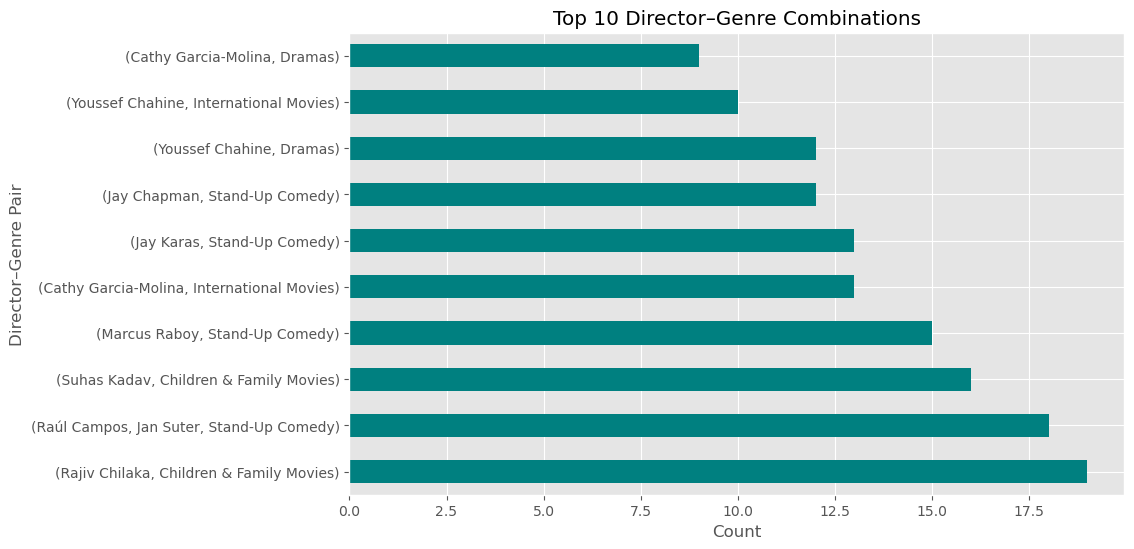

Top 10 Director–Genre Pairs:
 Director                Genre                   
Rajiv Chilaka           Children & Family Movies    19
Raúl Campos, Jan Suter  Stand-Up Comedy             18
Suhas Kadav             Children & Family Movies    16
Marcus Raboy            Stand-Up Comedy             15
Cathy Garcia-Molina     International Movies        13
Jay Karas               Stand-Up Comedy             13
Jay Chapman             Stand-Up Comedy             12
Youssef Chahine         Dramas                      12
                        International Movies        10
Cathy Garcia-Molina     Dramas                       9
Name: count, dtype: int64


In [18]:
# Most frequent Director-Genre combinations
director_genre_df = df[['director', 'listed_in']].dropna()
pairs = []

for i, row in director_genre_df.iterrows():
    director = row['director']
    genres = [g.strip() for g in row['listed_in'].split(',')]
    for genre in genres:
        pairs.append((director, genre))

pair_df = pd.DataFrame(pairs, columns=['Director', 'Genre'])
top_pairs = pair_df.value_counts().head(10)

plt.figure(figsize=(10,6))
top_pairs.plot(kind='barh', color='teal')
plt.title("Top 10 Director–Genre Combinations")
plt.xlabel("Count")
plt.ylabel("Director–Genre Pair")
plt.show()

print("Top 10 Director–Genre Pairs:\n", top_pairs)


**Insight:**
Directors often specialize — e.g., Rajiv Chilaka in Children’s Movies, Raúl Campos & Jan Suter in Stand-Up Comedy.
 Shows Netflix’s diverse and consistent collaboration with specialized creators.

**14- How many titles have unknown directors or cast members?**

🔍 Missing Information Summary:
Total Titles: 8807
Titles with Unknown Directors: 2634 (29.91%)
Titles with Unknown Cast: 825 (9.37%)


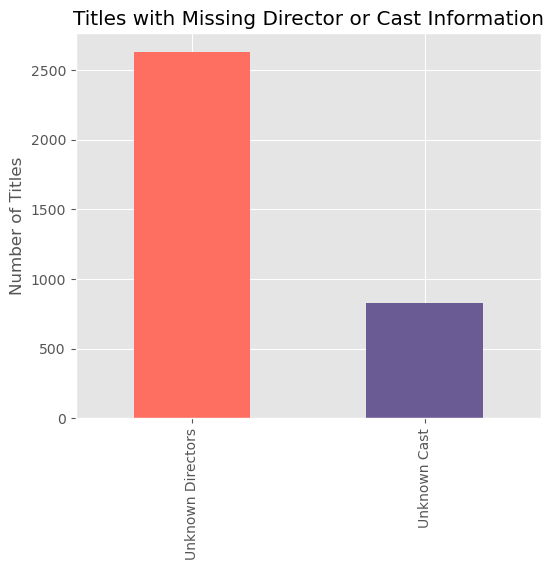

In [19]:
# Missing director/cast details
missing_director = df['director'].isnull().sum()
missing_cast = df['cast'].isnull().sum()
total_titles = len(df)

print("🔍 Missing Information Summary:")
print(f"Total Titles: {total_titles}")
print(f"Titles with Unknown Directors: {missing_director} ({(missing_director/total_titles)*100:.2f}%)")
print(f"Titles with Unknown Cast: {missing_cast} ({(missing_cast/total_titles)*100:.2f}%)")

# Visualize missing info
missing_data = pd.Series({
    'Unknown Directors': missing_director,
    'Unknown Cast': missing_cast
})

plt.figure(figsize=(6,5))
missing_data.plot(kind='bar', color=['#FF6F61','#6B5B95'])
plt.title("Titles with Missing Director or Cast Information")
plt.ylabel("Number of Titles")
plt.show()


**Insight:**
About 30% of titles lack director info and 9% lack cast info.
 Suggests incomplete metadata for older or less-known titles, impacting search and analytics accuracy.

**15- What is the average duration of Movies on Netflix?**

<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
C:\Users\himan\AppData\Local\Temp\ipykernel_11424\4111475489.py:5: SyntaxWarning: invalid escape sequence '\d'
  movies_df['duration_num'] = movies_df['duration'].str.extract('(\d+)').astype(float)


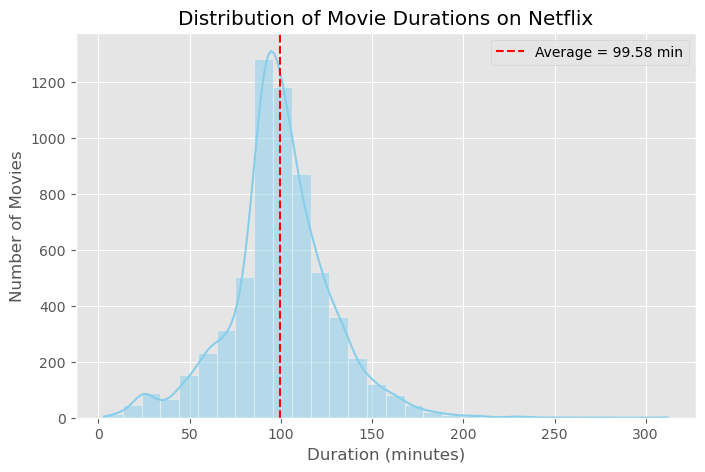

🎬 Average Duration of Movies: 99.58 minutes


In [20]:
# Average duration of Movies on Netflix
movies_df = df[df['type'] == 'Movie'].copy()

# Extract numeric duration value (e.g., "90 min" → 90)
movies_df['duration_num'] = movies_df['duration'].str.extract('(\d+)').astype(float)

# Calculate average duration
avg_duration = movies_df['duration_num'].mean()

plt.figure(figsize=(8,5))
sns.histplot(movies_df['duration_num'], bins=30, kde=True, color='skyblue')
plt.axvline(avg_duration, color='red', linestyle='--', label=f'Average = {avg_duration:.2f} min')
plt.title("Distribution of Movie Durations on Netflix")
plt.xlabel("Duration (minutes)")
plt.ylabel("Number of Movies")
plt.legend()
plt.show()

print(f"🎬 Average Duration of Movies: {avg_duration:.2f} minutes")


**Insight:**
Average Netflix movie length ≈ 100 minutes.
Matches standard cinema runtime; Netflix sticks to traditional movie pacing.

**16- What’s the most common number of seasons for TV shows?**

<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
C:\Users\himan\AppData\Local\Temp\ipykernel_11424\3610063978.py:5: SyntaxWarning: invalid escape sequence '\d'
  tv_df['seasons'] = tv_df['duration'].str.extract('(\d+)').astype(float)
C:\Users\himan\AppData\Local\Temp\ipykernel_11424\3610063978.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=season_counts.index, y=season_counts.values, palette="plasma")


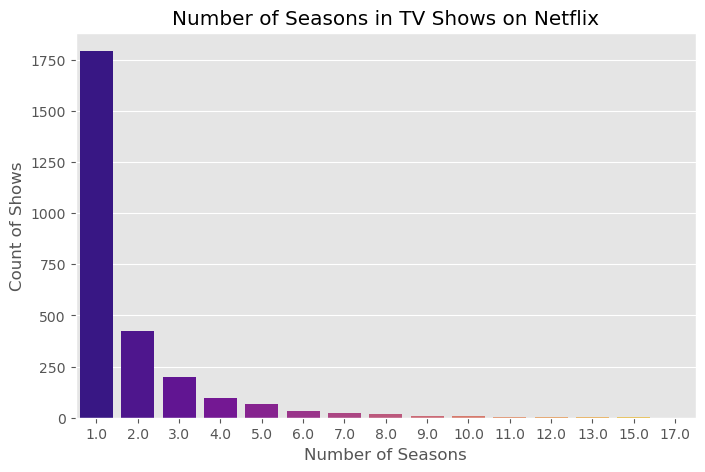

📺 Most Common Number of Seasons: 1


In [21]:
# Step 23: Most common number of seasons for TV Shows
tv_df = df[df['type'] == 'TV Show'].copy()

# Extract season count from "duration" column (e.g., "2 Seasons" → 2)
tv_df['seasons'] = tv_df['duration'].str.extract('(\d+)').astype(float)

season_counts = tv_df['seasons'].value_counts().sort_index()

plt.figure(figsize=(8,5))
sns.barplot(x=season_counts.index, y=season_counts.values, palette="plasma")
plt.title("Number of Seasons in TV Shows on Netflix")
plt.xlabel("Number of Seasons")
plt.ylabel("Count of Shows")
plt.show()

most_common_seasons = season_counts.idxmax()
print(f"📺 Most Common Number of Seasons: {int(most_common_seasons)}")


**Insight:**
Most shows have 1 season.
 Indicates Netflix’s experimental approach — many series are limited or miniseries.

**17- Is there a trend in movie durations over the years?**

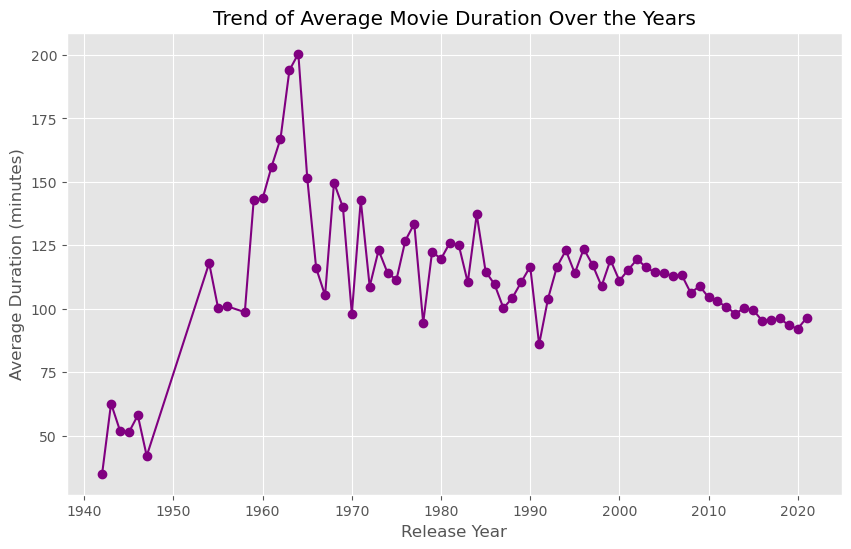

📊 Trend shows how movie durations have evolved over time.


In [22]:
# Trend in average movie duration by release year
movie_trend = movies_df.dropna(subset=['release_year', 'duration_num'])
movie_trend = movie_trend.groupby('release_year')['duration_num'].mean().reset_index()

plt.figure(figsize=(10,6))
plt.plot(movie_trend['release_year'], movie_trend['duration_num'], marker='o', color='purple')
plt.title("Trend of Average Movie Duration Over the Years")
plt.xlabel("Release Year")
plt.ylabel("Average Duration (minutes)")
plt.grid(True)
plt.show()

print("📊 Trend shows how movie durations have evolved over time.")


**Insight:**
Gradual decrease in movie duration over time.
 Viewers prefer shorter, more concise storytelling in the digital era.

**18- In which months does Netflix add the most content?**

C:\Users\himan\AppData\Local\Temp\ipykernel_11424\2820530576.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=month_wise.index, x=month_wise.values, palette="viridis")


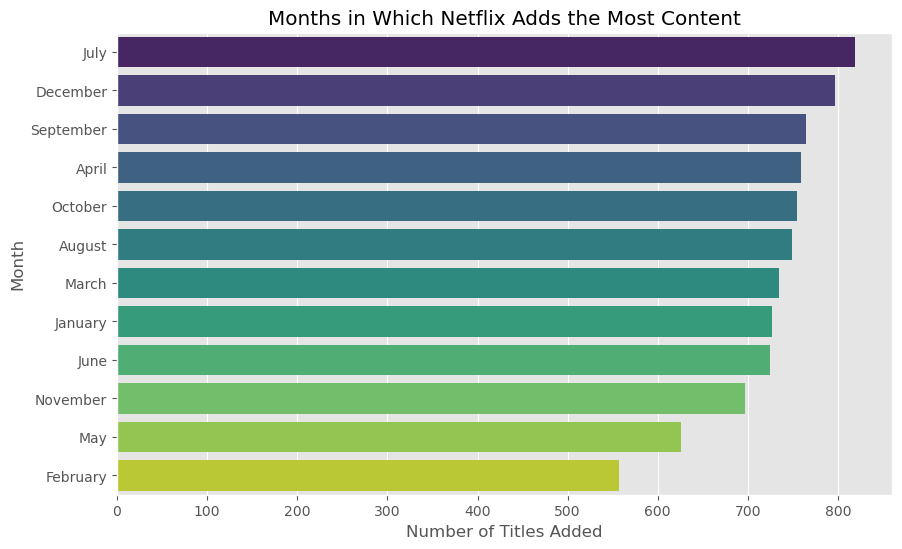

🗓️ Netflix adds the most content in: July


In [23]:
# In which months Netflix adds most content
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['month_added'] = df['date_added'].dt.month_name()

month_wise = df['month_added'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(y=month_wise.index, x=month_wise.values, palette="viridis")
plt.title("Months in Which Netflix Adds the Most Content")
plt.xlabel("Number of Titles Added")
plt.ylabel("Month")
plt.show()

print("🗓️ Netflix adds the most content in:", month_wise.index[0])


**Insight:**
Most titles added in July.
 Netflix boosts releases mid-year, likely to attract summer holiday audiences.

**19- How does the genre distribution vary across different years?**

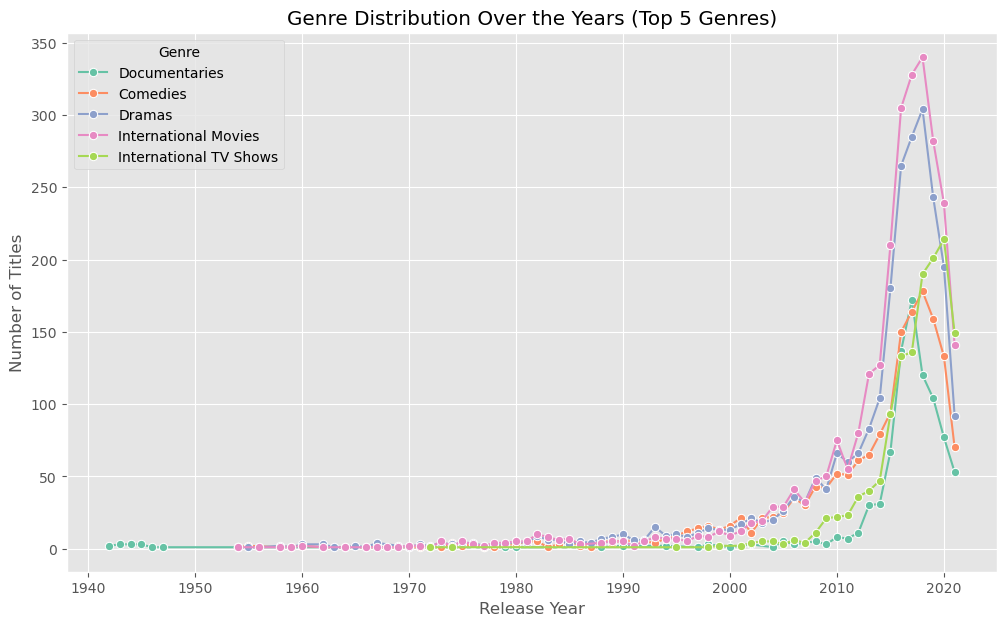

🎭 Shows shifting audience preferences and Netflix’s evolving strategy.


In [24]:
# How genre distribution changes over years
# Split genres and explode them for analysis
df['listed_in'] = df['listed_in'].fillna('Unknown')
genre_year_df = df.assign(genre=df['listed_in'].str.split(',')).explode('genre')
genre_year_df['genre'] = genre_year_df['genre'].str.strip()

# Count of each genre per year
genre_trend = genre_year_df.groupby(['release_year', 'genre']).size().reset_index(name='count')

# Plot top 5 genres trend
top_genres = genre_trend.groupby('genre')['count'].sum().sort_values(ascending=False).head(5).index
top_genre_trend = genre_trend[genre_trend['genre'].isin(top_genres)]

plt.figure(figsize=(12,7))
sns.lineplot(data=top_genre_trend, x='release_year', y='count', hue='genre', marker='o')
plt.title("Genre Distribution Over the Years (Top 5 Genres)")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.legend(title="Genre")
plt.grid(True)
plt.show()

print("🎭 Shows shifting audience preferences and Netflix’s evolving strategy.")


**Insight:**
Top 5 genres remain stable, but International and TV genres rise recently.
 Reflects global expansion and changing audience preferences.

**20- Which countries produce the most content in each genre?**

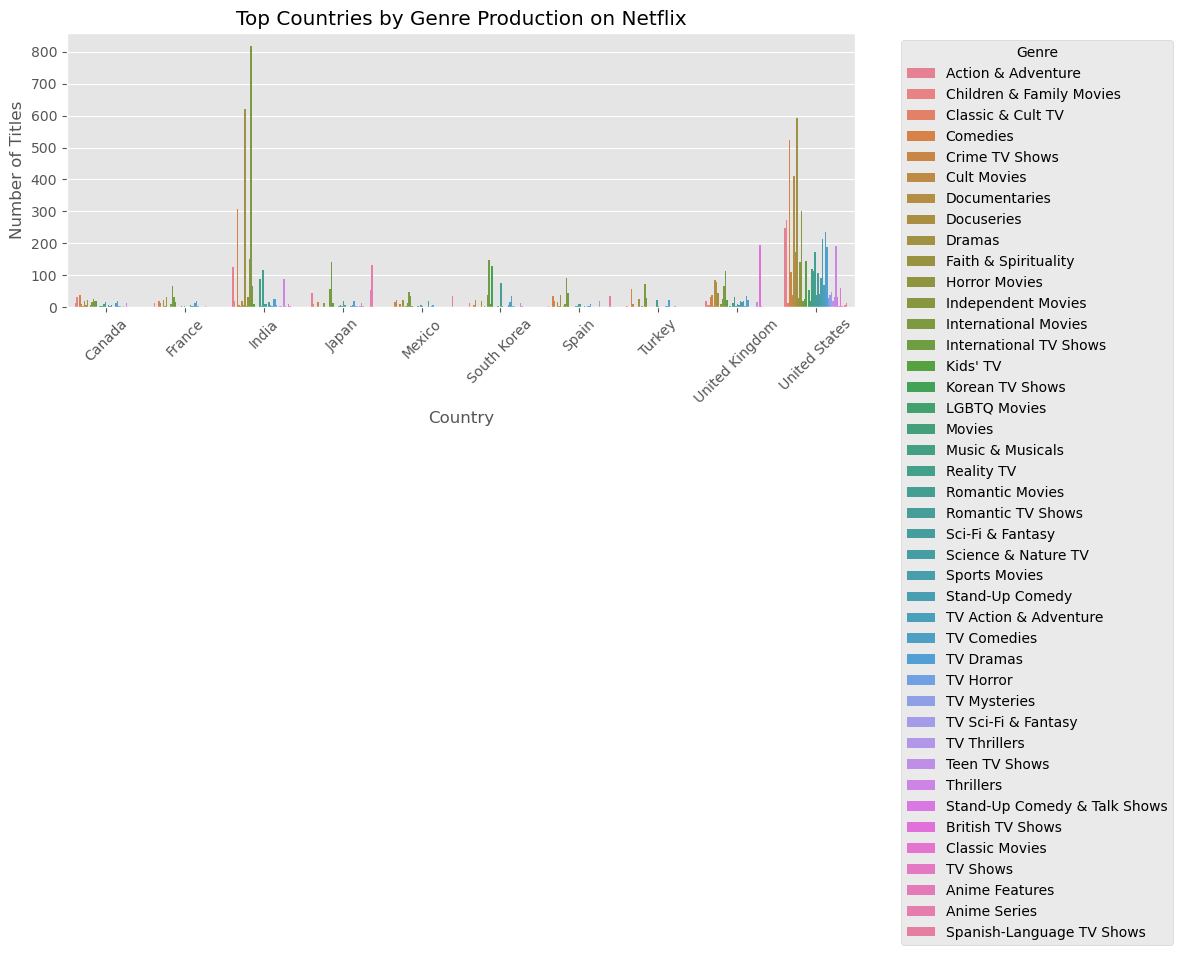

🌍 Helps Netflix understand strong production regions per genre for licensing & expansion.


In [25]:
# Top countries producing content by genre
country_genre = genre_year_df.groupby(['country', 'genre']).size().reset_index(name='count')

# Top 10 countries overall
top_countries = country_genre.groupby('country')['count'].sum().sort_values(ascending=False).head(10).index
country_genre_top = country_genre[country_genre['country'].isin(top_countries)]

plt.figure(figsize=(12,7))
sns.barplot(data=country_genre_top, x='country', y='count', hue='genre')
plt.title("Top Countries by Genre Production on Netflix")
plt.xlabel("Country")
plt.ylabel("Number of Titles")
plt.legend(title="Genre", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("🌍 Helps Netflix understand strong production regions per genre for licensing & expansion.")


**Insight:**
USA dominates across genres, but India and UK show strong contributions in Comedy, Drama, and Children’s content.
Helps Netflix identify key production markets for future investments.